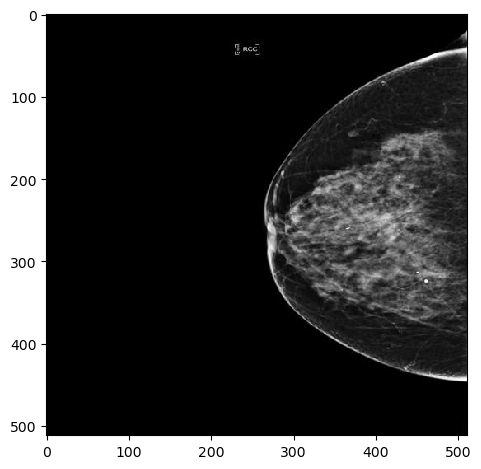

In [175]:
import dask.array as da
import pyclesperanto_prototype as cle
import numpy as np
import skimage.filters as filters
import skimage.io as io
import skimage.exposure as exposure
import skimage.segmentation as segmentation
from skimage.io import imread, imshow, imsave
image_cancer = imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/with_cancer.png")
image_cancer = da.from_array(io.imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/with_cancer.png"))
imshow(image_cancer)

In [176]:
da.from_array
image_cancer = image_cancer.compute()


In [177]:
image_cancer = exposure.equalize_adapthist(image_cancer, clip_limit=0.03)

In [178]:
image_cancer= filters.gaussian(image_cancer, sigma=1)

C:\Anaconda\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


In [179]:
segments = segmentation.slic(image_cancer, n_segments=100, compactness=10)
io.imsave("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/breast_cancer_segmented_with_cancer.png", segmentation.mark_boundaries(image_cancer, segments))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


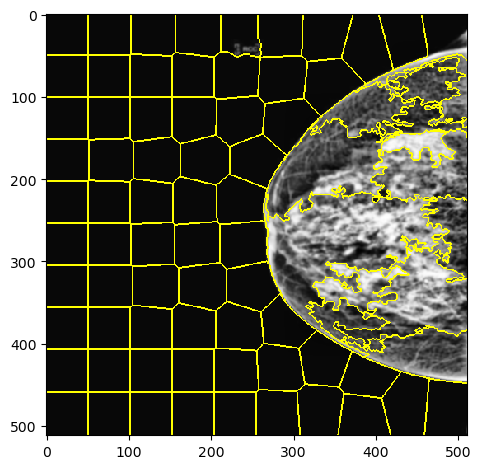

In [180]:
image_segmented = imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/breast_cancer_segmented_with_cancer.png")
imshow(image_segmented)

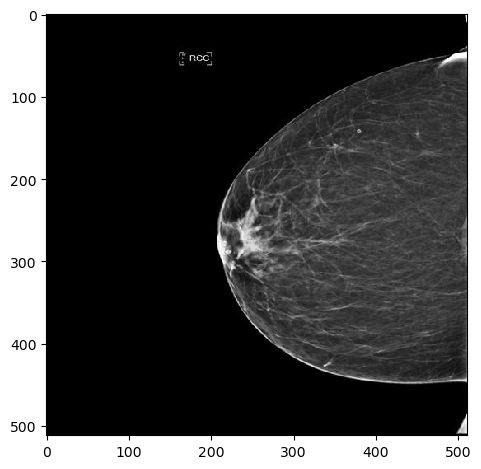

In [206]:
import dask.array as da
import pyclesperanto_prototype as cle
import numpy as np
import skimage.filters as filters
import skimage.io as io
import skimage.exposure as exposure
import skimage.segmentation as segmentation
from skimage.io import imread, imshow, imsave
image_no_cancer = imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/no_cancer.png")
image_no_cancer = da.from_array(io.imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/no_cancer.png"))
imshow(image_no_cancer)

In [207]:
da.from_array
image_no_cancer = image_no_cancer.compute()


In [208]:
image_no_cancer = exposure.equalize_adapthist(image_no_cancer, clip_limit=0.02)

In [209]:
image_no_cancer= filters.gaussian(image_no_cancer, sigma=1)

C:\Anaconda\lib\site-packages\skimage\_shared\utils.py:348: RuntimeWarning: Images with dimensions (M, N, 3) are interpreted as 2D+RGB by default. Use `multichannel=False` to interpret as 3D image with last dimension of length 3.
  return func(*args, **kwargs)


In [210]:
segments = segmentation.slic(image_no_cancer, n_segments=100, compactness=10)
io.imsave("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/breast_cancer_segmented_no_cancer.png", segmentation.mark_boundaries(image_no_cancer, segments))

Lossy conversion from float64 to uint8. Range [0, 1]. Convert image to uint8 prior to saving to suppress this warning.


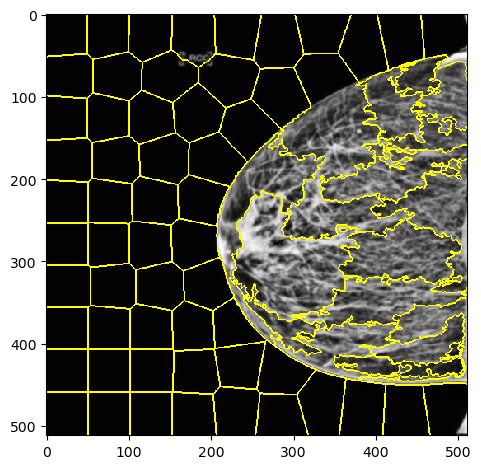

In [211]:
image_segmented_no_cancer = imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/breast_cancer_segmented_no_cancer.png")
imshow(image_segmented_no_cancer)

In [216]:
import skimage.io as io
import skimage.metrics as metrics
from skimage import io, transform

image_cancer_1 = io.imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/breast_cancer_segmented_with_cancer.png")
image_no_cancer_2 = io.imread("C:/Users/Natisa Anjum/Image_analysis_Brest_cancer/archive/Tif/breast_cancer_segmented_no_cancer.png")

image_resized_no_cancer = transform.resize(image_cancer_1, (256, 256), anti_aliasing=True)
image_resized_cancer = transform.resize(image_no_cancer_2, (256, 256), anti_aliasing=True)

# the SSIM between the two images
ssim = metrics.structural_similarity(image_resized_no_cancer, image_resized_cancer, win_size=3)



print("SSIM: {:.2f}".format(ssim))

SSIM: 0.37
